In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv(r"D:\excelr assignments\neural networks\gas_turbines.csv")

In [3]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [4]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [5]:
#no missing values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [7]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [8]:
df.duplicated().sum()

0

In [9]:
df.shape

(15039, 11)

In [10]:
#eda

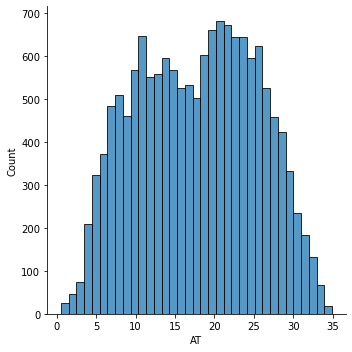

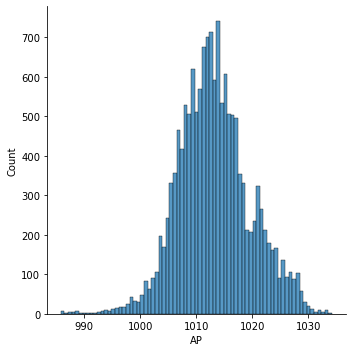

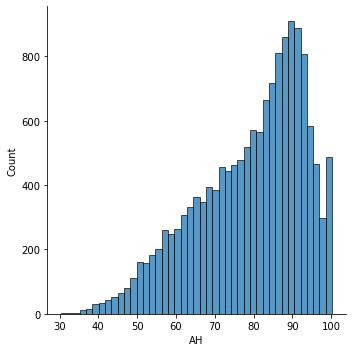

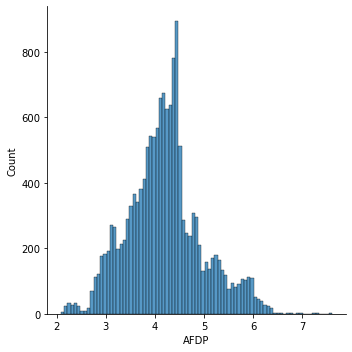

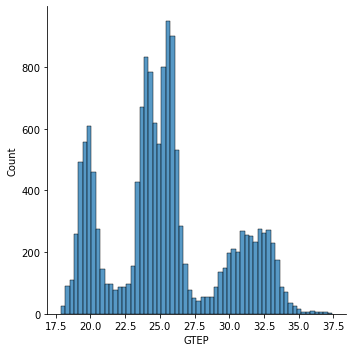

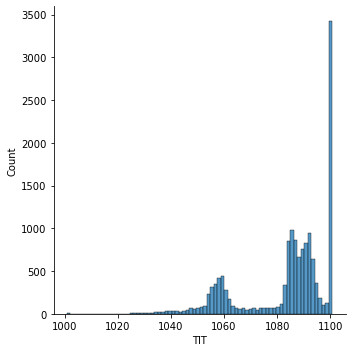

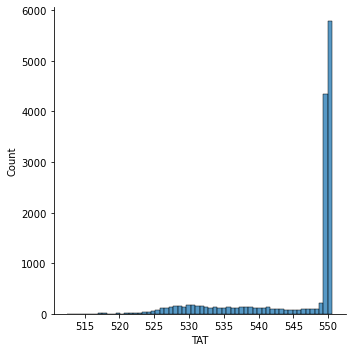

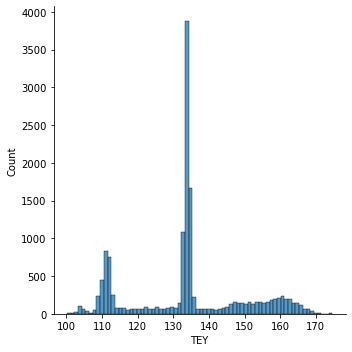

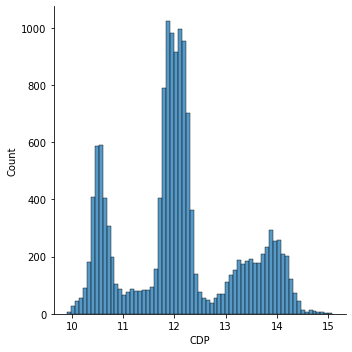

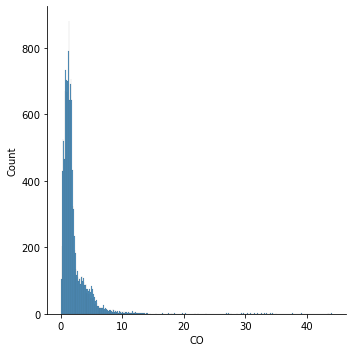

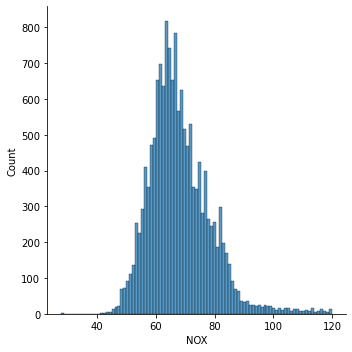

In [11]:
for i in df.columns:
    sns.displot(df[i])

In [12]:
df.skew()

AT     -0.030710
AP      0.107601
AH     -0.681224
AFDP    0.315150
GTEP    0.370987
TIT    -1.133744
TAT    -1.485524
TEY     0.145963
CDP     0.263042
CO      6.534577
NOX     1.126605
dtype: float64

In [13]:
#Some of the features are normally distributed. 
#The features AH, CO, TITy and TATa exhibit the highest skew coefficients.
#The distribution of Carbon Mono oxide (CO) and Turbine inlet temperature (TIT) and Turbine after temperature (TAT) seem to contain many outliers

<AxesSubplot:xlabel='NOX'>

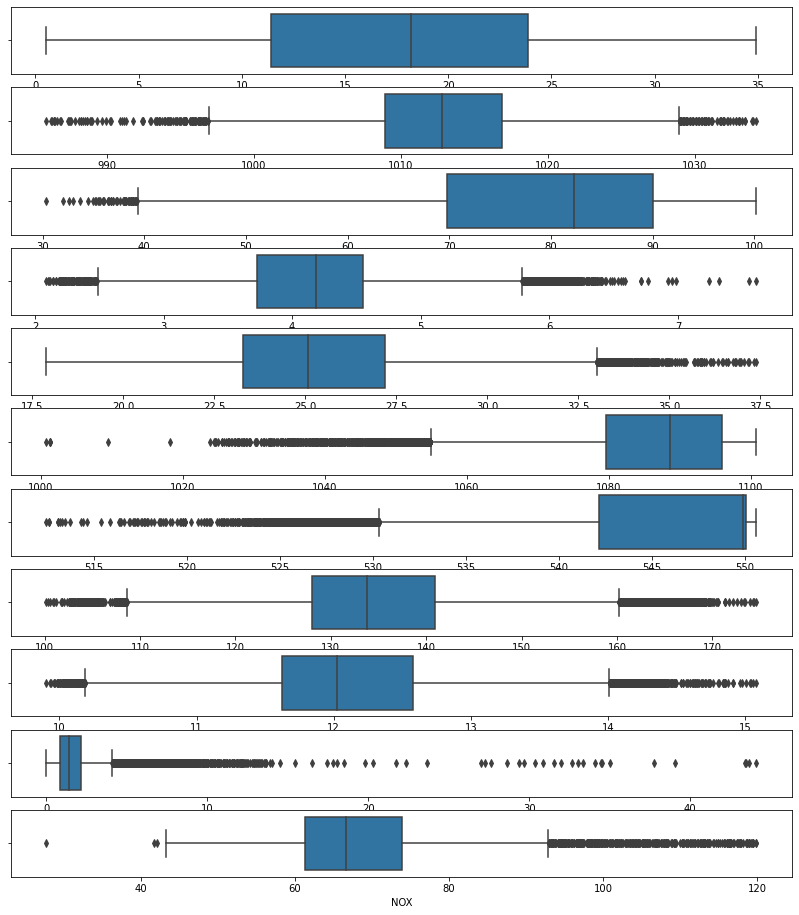

In [14]:
fig, axes=plt.subplots(11,1,figsize=(14,16),sharex=False,sharey=False)
sns.boxplot(x='AT',data=df,ax=axes[0])
sns.boxplot(x='AP',data=df,ax=axes[1])
sns.boxplot(x='AH',data=df,ax=axes[2])
sns.boxplot(x='AFDP',data=df,ax=axes[3])
sns.boxplot(x='GTEP',data=df,ax=axes[4])
sns.boxplot(x='TIT',data=df,ax=axes[5])
sns.boxplot(x='TAT',data=df,ax=axes[6])
sns.boxplot(x='TEY',data=df,ax=axes[7])
sns.boxplot(x='CDP',data=df,ax=axes[8])
sns.boxplot(x='CO',data=df,ax=axes[9])
sns.boxplot(x='NOX',data=df,ax=axes[10])

In [15]:
#Most of the features contain outliers as visible from box plots

<AxesSubplot:xlabel='TEY', ylabel='Count'>

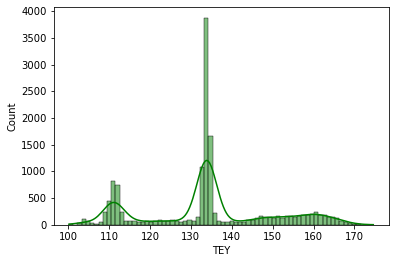

In [16]:
sns.histplot(data=df,x="TEY",color="green",kde=True)

<AxesSubplot:xlabel='TEY', ylabel='Count'>

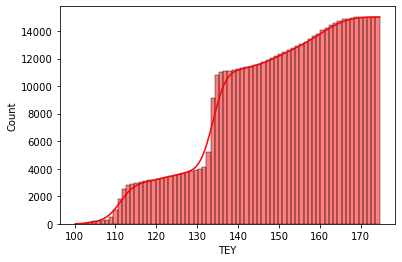

In [17]:
sns.histplot(data=df,x="TEY",color="red",kde=True,cumulative=True)

<AxesSubplot:>

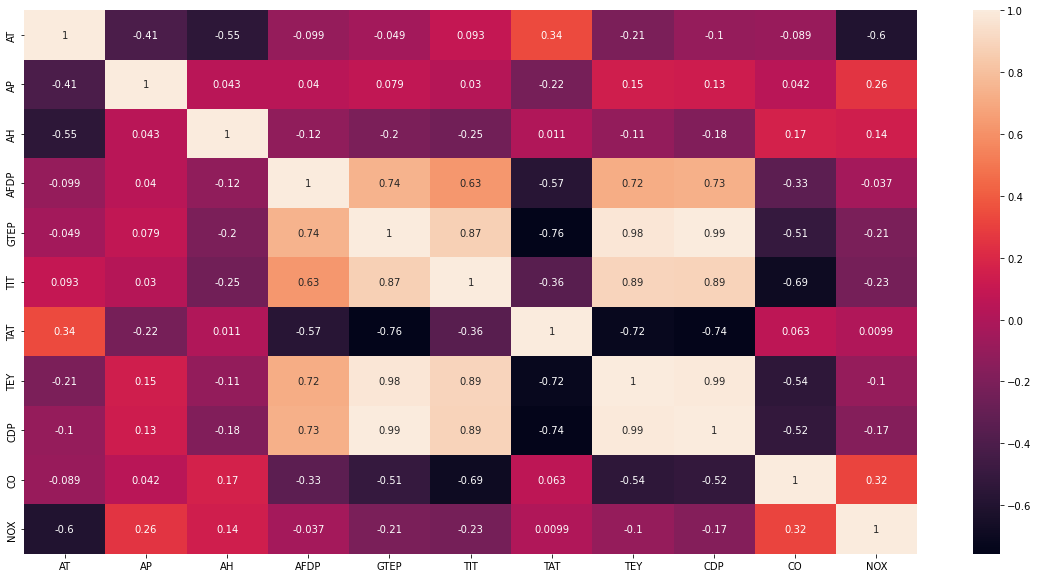

In [18]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)

In [19]:
# features like CDP TIT,GTEP,AFDP are having very high positive correalation with the dependent variable

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [21]:
x = df.drop(['TEY'],axis=1)
y = df['TEY']

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [24]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [27]:
x_train.shape

(12031, 10)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU

In [26]:
model = Sequential()

In [28]:
model.add(Dense(units=20, input_dim=10,kernel_initializer='normal',activation='relu'))
model.add(Dense(units=10, kernel_initializer='normal', activation='tanh'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(optimizer ='adam', loss = 'mean_squared_error')

In [29]:
model.fit(x_train,y_train, batch_size=20, epochs=100)

Epoch 1/100
602/602 [==============================] - 1s 790us/step - loss: 17048.5469
Epoch 2/100
602/602 [==============================] - 0s 770us/step - loss: 15200.3965
Epoch 3/100
602/602 [==============================] - 0s 769us/step - loss: 13649.0000
Epoch 4/100
602/602 [==============================] - 0s 775us/step - loss: 12226.5596
Epoch 5/100
602/602 [==============================] - 0s 757us/step - loss: 10909.3672
Epoch 6/100
602/602 [==============================] - 1s 1ms/step - loss: 9686.5049
Epoch 7/100
602/602 [==============================] - 0s 750us/step - loss: 8551.1670
Epoch 8/100
602/602 [==============================] - 0s 775us/step - loss: 7499.6504
Epoch 9/100
602/602 [==============================] - 0s 786us/step - loss: 6528.9038
Epoch 10/100
602/602 [==============================] - 0s 775us/step - loss: 5636.5005
Epoch 11/100
602/602 [==============================] - 0s 754us/step - loss: 4820.4531
Epoch 12/100
602/602 [================

In [30]:
pred = model.predict(x_test)

94/94 [==============================] - 0s 664us/step


In [31]:
from sklearn import metrics

In [32]:
metrics.r2_score(y_test,pred)

0.9979385581585294

In [33]:
metrics.mean_squared_error(y_test,pred)

0.5019717947855602

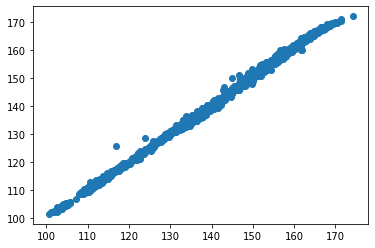

In [34]:
plt.scatter(y_test,pred)